# TensorFlow Version

In [ ]:
# TensorFlor Version 확인
import tensorflow as tf

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
!python --version

Python 3.10.12


# UNZIP

In [ ]:
# 데이터셋 압축 풀기
%cd /content/drive/MyDrive/datasets/

/content/drive/MyDrive/datasets


In [ ]:
!ls

dataset.zip


In [ ]:
# 압축 풀기
!unzip dataset.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: dataset/training_set/cats/cat.3347.jpg  
  inflating: __MACOSX/dataset/training_set/cats/._cat.3347.jpg  
  inflating: dataset/training_set/cats/cat.975.jpg  
  inflating: __MACOSX/dataset/training_set/cats/._cat.975.jpg  
  inflating: dataset/training_set/cats/cat.2059.jpg  
  inflating: __MACOSX/dataset/training_set/cats/._cat.2059.jpg  
  inflating: dataset/training_set/cats/cat.1550.jpg  
  inflating: __MACOSX/dataset/training_set/cats/._cat.1550.jpg  
  inflating: dataset/training_set/cats/cat.746.jpg  
  inflating: __MACOSX/dataset/training_set/cats/._cat.746.jpg  
  inflating: dataset/training_set/cats/cat.9.jpg  
  inflating: __MACOSX/dataset/training_set/cats/._cat.9.jpg  
  inflating: dataset/training_set/cats/cat.2918.jpg  
  inflating: __MACOSX/dataset/training_set/cats/._cat.2918.jpg  
  inflating: dataset/training_set/cats/cat.752.jpg  
  inflating: __MACOSX/dataset/training_set/cats/._cat.752.jpg  
  inflating: dataset/tra

# 라이브러리 불러오기

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 디렉토리 정보 추출
from glob import glob

In [ ]:
# import ai library
import tensorflow as tf
import tensorflow.keras

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, ReLU, Flatten, BatchNormalization

# Application
from tensorflow.keras.applications.vgg16 import VGG16

# 데이터 처리(데이터 증량) - ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing import image

In [3]:
# image size setting
image_size = [224, 224]
# input_image_size = [224, 224, 3]

# Matrix Addition

In [4]:
test = [224, 224]
test
test = test + [3]
test

[224, 224, 3]

# Train Data

In [5]:
# Train Data
train_data = '/content/drive/MyDrive/datasets/training_set/'
test_data = '/content/drive/MyDrive/datasets/test_set/'

In [6]:
# import VGG16 Model
vgg16 = VGG16(include_top = False, weights = 'imagenet', input_shape = image_size + [3]) # include_top = True(수정X) / False(수정O)

58889256/58889256 [==============================] - 0s 0us/step


In [7]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
# import VGG16 Model
vgg16_1 = VGG16(include_top = True, weights = 'imagenet')# , input_shape=image_size + [3]) # include_top = True(수정X) / False(수정O)

553467096/553467096 [==============================] - 3s 0us/step


In [9]:
vgg16_1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
# 레이어 구조 확인
for layers in vgg16.layers:
  layers.trainable = False

In [11]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# 모델 설계

In [12]:
x = Flatten()(vgg16.output)

In [13]:
# 디렉토리 정보 추출
dir = glob(test_data + '*') # 리눅스/맥에서 .test 같은 히든 파일이 있으면 에러 발생할 수 있음

In [14]:
dir

['/content/drive/MyDrive/datasets/test_set/dogs',
 '/content/drive/MyDrive/datasets/test_set/cats']

In [15]:
len(dir)

2

In [16]:
# 마지막 레이어 층 생성
last_dense = Dense(len(dir), activation = 'softmax')(x)

In [17]:
vgg16_new = Model(inputs = vgg16.inputs, outputs = last_dense)

In [18]:
vgg16_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
# 모델 컴파일
vgg16_new.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) # 학습이 바이너리로 된 것이 아니라서 loss 값을 categorical_crossentropy

In [20]:
# 데이터 처리(데이터 증량) - ImageDataGenerator
training_data = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    horizontal_flip = True,
    zoom_range = 0.2
)

In [21]:
testing_data = ImageDataGenerator(rescale=1./255)

In [22]:
# 데이터 정규화
train = training_data.flow_from_directory(
    train_data,
    target_size = image_size,
    batch_size = 32,
    class_mode = 'categorical'
)

Found 8000 images belonging to 2 classes.


In [25]:
test = testing_data.flow_from_directory(
    test_data,
    target_size = image_size,
    batch_size = 32,
    class_mode = 'categorical'
)

Found 2000 images belonging to 2 classes.


In [26]:
# 모델 훈련
vgg16_new.fit(train, validation_data = test, epochs = 50, steps_per_epoch = len(train), validation_steps = len(test))

Epoch 1/50
250/250 [==============================] - 948s 4s/step - loss: 0.2012 - accuracy: 0.9168 - val_loss: 0.2587 - val_accuracy: 0.8960
Epoch 2/50
250/250 [==============================] - 146s 585ms/step - loss: 0.1983 - accuracy: 0.9221 - val_loss: 0.2370 - val_accuracy: 0.9075
Epoch 3/50
250/250 [==============================] - 143s 573ms/step - loss: 0.1826 - accuracy: 0.9284 - val_loss: 0.1843 - val_accuracy: 0.9340
Epoch 4/50
250/250 [==============================] - 144s 576ms/step - loss: 0.1483 - accuracy: 0.9406 - val_loss: 0.2206 - val_accuracy: 0.9220
Epoch 5/50
250/250 [==============================] - 154s 617ms/step - loss: 0.1415 - accuracy: 0.9439 - val_loss: 0.2031 - val_accuracy: 0.9300
Epoch 6/50
250/250 [==============================] - 144s 578ms/step - loss: 0.1328 - accuracy: 0.9485 - val_loss: 0.3609 - val_accuracy: 0.8860
Epoch 7/50
250/250 [==============================] - 143s 571ms/step - loss: 0.1214 - accuracy: 0.9494 - val_loss: 0.2079 - va

In [27]:
# 현재 모델의 history 정보
vgg16_new.history.history.keys()
# dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
# loss 정보 확인
train_loss = vgg16_new.history.history['loss']

In [30]:
train_loss

[0.20124934613704681,
 0.1982506811618805,
 0.1826181262731552,
 0.14831463992595673,
 0.14154119789600372,
 0.13283862173557281,
 0.12137243151664734,
 0.12142371386289597,
 0.16982127726078033,
 0.10211852937936783,
 0.10232295095920563,
 0.08746394515037537,
 0.09811276197433472,
 0.08805365860462189,
 0.09416044503450394,
 0.09388098865747452,
 0.10888904333114624,
 0.07868631929159164,
 0.07718221098184586,
 0.06477206200361252,
 0.07879369705915451,
 0.07487404346466064,
 0.11150380223989487,
 0.07640613615512848,
 0.06736737489700317,
 0.060947827994823456,
 0.06999848037958145,
 0.08786074817180634,
 0.07603047788143158,
 0.06670241057872772,
 0.06777454167604446,
 0.06239888072013855,
 0.04841340705752373,
 0.07923045009374619,
 0.06276828795671463,
 0.06562943756580353,
 0.06074702367186546,
 0.0451490618288517,
 0.0492963045835495,
 0.06782078742980957,
 0.080827996134758,
 0.05645840987563133,
 0.06073998659849167,
 0.06945199519395828,
 0.07173656672239304,
 0.061210840940

In [32]:
# 정확도 확인
train_accuracy = vgg16_new.history.history['accuracy']

In [33]:
train_accuracy

[0.9167500138282776,
 0.922124981880188,
 0.9283750057220459,
 0.940625011920929,
 0.9438750147819519,
 0.9484999775886536,
 0.9493749737739563,
 0.952750027179718,
 0.937874972820282,
 0.9596250057220459,
 0.9581249952316284,
 0.9653750061988831,
 0.9611250162124634,
 0.9674999713897705,
 0.965624988079071,
 0.9642500281333923,
 0.9586250185966492,
 0.9676250219345093,
 0.9712499976158142,
 0.9743750095367432,
 0.9693750143051147,
 0.9735000133514404,
 0.9606249928474426,
 0.9732499718666077,
 0.9752500057220459,
 0.9773749709129333,
 0.9731249809265137,
 0.9682499766349792,
 0.9728749990463257,
 0.9753749966621399,
 0.9751250147819519,
 0.9758750200271606,
 0.9826250076293945,
 0.9727500081062317,
 0.9776250123977661,
 0.9738749861717224,
 0.9783750176429749,
 0.9851250052452087,
 0.9817500114440918,
 0.9766250252723694,
 0.9727500081062317,
 0.9800000190734863,
 0.9787499904632568,
 0.9757500290870667,
 0.9736250042915344,
 0.9764999747276306,
 0.984000027179718,
 0.9831249713897705

In [34]:
# loss 정보 확인
test_loss = vgg16_new.history.history['val_loss']

In [35]:
test_loss

[0.25872573256492615,
 0.23703047633171082,
 0.18434946238994598,
 0.2206425964832306,
 0.20310258865356445,
 0.3609180152416229,
 0.20789214968681335,
 0.32218876481056213,
 0.25152623653411865,
 0.2315736562013626,
 0.2331935465335846,
 0.24869754910469055,
 0.251840740442276,
 0.34378087520599365,
 0.4687614142894745,
 0.25982344150543213,
 0.26999571919441223,
 0.2605658769607544,
 0.31317633390426636,
 0.28446540236473083,
 0.2957494258880615,
 0.299265593290329,
 0.4117937386035919,
 0.28713539242744446,
 0.2767925560474396,
 0.2968549430370331,
 0.31886452436447144,
 0.315309077501297,
 0.33826348185539246,
 0.3182631731033325,
 0.4101202189922333,
 0.33489251136779785,
 0.3345281183719635,
 0.5252248644828796,
 0.33532950282096863,
 0.3541693687438965,
 0.36458855867385864,
 0.34370821714401245,
 0.37516677379608154,
 0.3727196455001831,
 0.44543156027793884,
 0.35979944467544556,
 0.41134360432624817,
 0.4807445704936981,
 0.4161033034324646,
 0.3540446162223816,
 0.4174155294

In [36]:
# 정확도 확인
test_accuracy = vgg16_new.history.history['val_accuracy']

In [37]:
test_accuracy

[0.8960000276565552,
 0.9075000286102295,
 0.9340000152587891,
 0.921999990940094,
 0.9300000071525574,
 0.8859999775886536,
 0.9319999814033508,
 0.9035000205039978,
 0.9204999804496765,
 0.9265000224113464,
 0.9319999814033508,
 0.9269999861717224,
 0.9319999814033508,
 0.9100000262260437,
 0.8830000162124634,
 0.9309999942779541,
 0.9325000047683716,
 0.9350000023841858,
 0.9269999861717224,
 0.9259999990463257,
 0.9294999837875366,
 0.9294999837875366,
 0.9120000004768372,
 0.934499979019165,
 0.9394999742507935,
 0.9350000023841858,
 0.9294999837875366,
 0.9340000152587891,
 0.9309999942779541,
 0.9319999814033508,
 0.9120000004768372,
 0.9284999966621399,
 0.9300000071525574,
 0.9035000205039978,
 0.9304999709129333,
 0.9259999990463257,
 0.9284999966621399,
 0.9315000176429749,
 0.9275000095367432,
 0.9269999861717224,
 0.9235000014305115,
 0.9319999814033508,
 0.9284999966621399,
 0.9190000295639038,
 0.9265000224113464,
 0.9365000128746033,
 0.9240000247955322,
 0.933499991893

In [38]:
# epochs 범위
epochs = np.arange(1, 51) # 총 50개

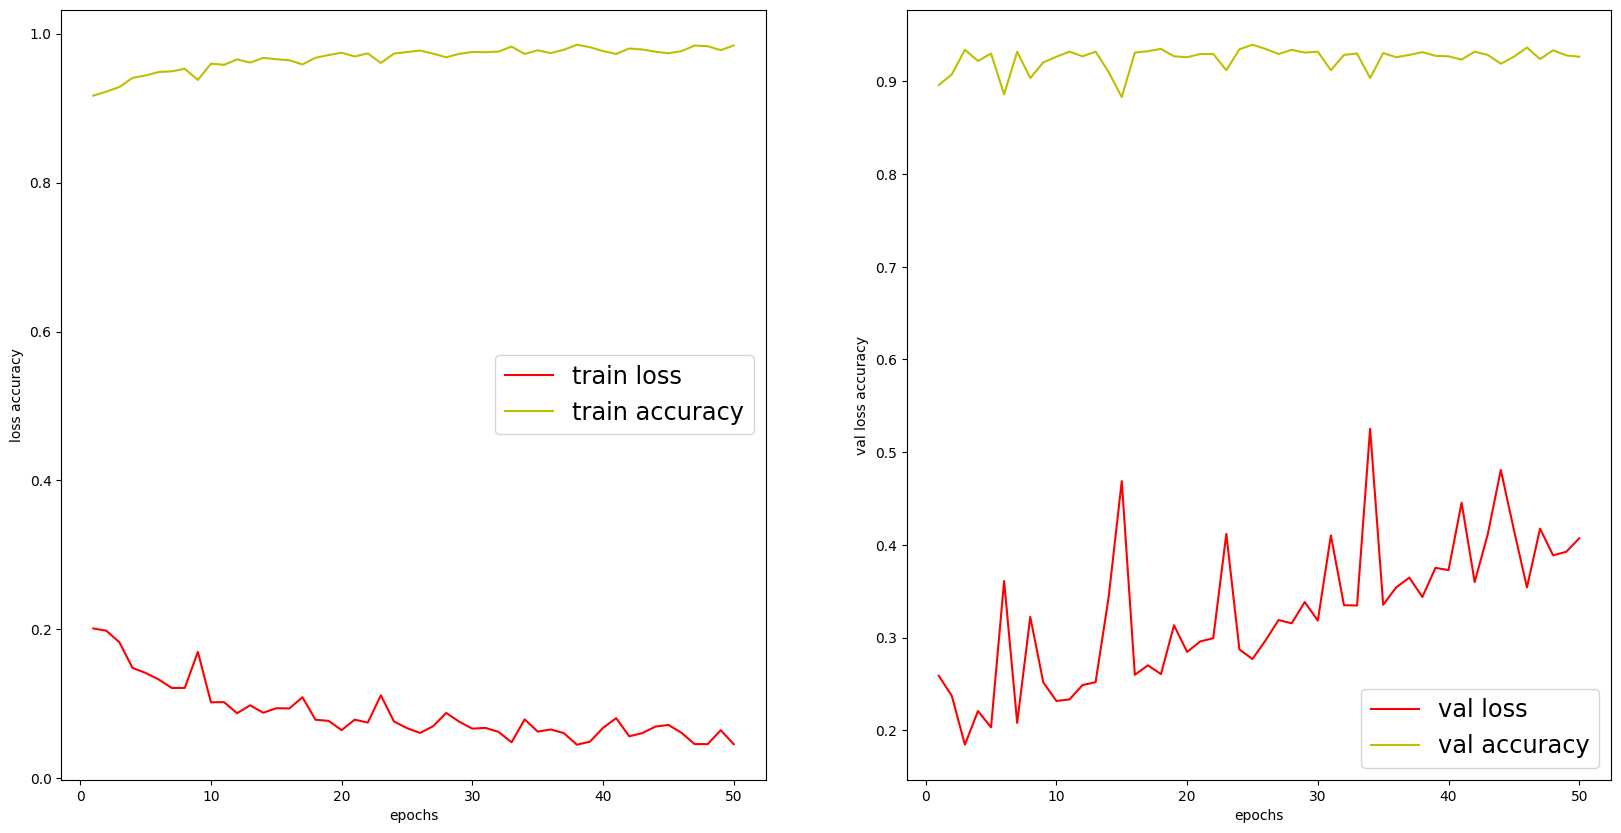

In [39]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, color = 'r', label = 'train loss')
plt.plot(epochs, train_accuracy, color = 'y', label = 'train accuracy')
plt.legend(loc ='best', fontsize = 'xx-large')
plt.xlabel('epochs')
plt.ylabel('loss accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, test_loss, color = 'r', label = 'val loss')
plt.plot(epochs, test_accuracy, color = 'y', label = 'val accuracy')
plt.legend(loc ='best', fontsize = 'xx-large')
plt.xlabel('epochs')
plt.ylabel('val loss accuracy')

plt.show()

In [40]:
# 예측을 위한 텍스트값 설정
classes = {0:"cat", 1:"dog"}
for i in classes.items():
  print(i)

(0, 'cat')
(1, 'dog')


In [41]:
# 학습결과 저장
vgg16_new.save('/content/drive/MyDrive/datasets/vgg16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
# 실제 동작시킬 때
image_path = './dog1.jpg' # 이미지 파일
new_img = image.load_img(image_path, target_size = (224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis = 0)
prediction = vgg16_new.predict(img)
print(prediction)
prediction = np.argmax(prediction, axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)

NameError: name 'Image' is not defined